# EDA(Exploratory Data Analysis)
### 1.Load Datasets
### 2.Clean data(missing values,duplicates,types)
### 3.treat outliers
### 4.Univariate,Bivariate and Multivariate Analysis
### 5.Insights

#### Outlier:A datapoint that is significantly different from other observations or datapoints in a dataset.
### How outliers will come ?
#### 1.Measurement Errors
#### 2.Data Entry mistakes

### Why they are important ?
#### 1.They can be errors
#### 2.They effect the data analysis

### How to identify the outliers?
#### 1.Visualization technique
#### --->Box Plots
#### --->Scatter plots
#### --->Histogram

#### 2.Statistical Method
#### ---->Interquartile Range(IQR)
#### ---->Z-Score

### Univariate Analysis - a method that analyzes a single variable to describe its characteristics,find patterns and summarize data.
#### It involves only one variable.

### Bivariate Analysis - It gives the relationship between two variables.It helps to discover or find if there is any correlation between the two variables and any association or any connection between the two variables.
#### It involves 2 variables (x & y)

### Multivariate Analysis - To understand how multiple factors interact and influence each other.
#### It involves more than 2 variables.
Example -
How age, studytime, and alcohol consumption together influence the final grade.

### ETL(Extract Transform Load)
### ELT(Extract Load Transform)
## EDA : Student Alcohol Consumption Dataset
1. Load & Overview
2. Cleaning(missing, dupes, dtypes)
3. Uni,Bi & Multi analysis
4. Outlier - IQR
5. Feature Engineering
6. Key Insights

### Feature Engineering: 
Feature Engineering is the process of turning raw data into useful features that helps to improve the performance of machine learning models.

### 1. Load libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


### 2. Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Divya\Desktop\Tekworks\student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



# Basic Information & Overview

In [3]:
print("Shape of dataset:", df.shape)
print("\n Data Info")
print(df.info())

# Summary 
print(df.describe())

Shape of dataset: (395, 33)

 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery   


# Missing values Analysis

In [4]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
school,0,0.0
sex,0,0.0
age,0,0.0
address,0,0.0
famsize,0,0.0
Pstatus,0,0.0
Medu,0,0.0
Fedu,0,0.0
Mjob,0,0.0
Fjob,0,0.0


In [5]:
# Handling Missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
print("Missing values cleaned:",df.isnull().sum().sum())

# Duplicates & Data type check 
print("Duplicate rows:",df.duplicated().sum())

Missing values cleaned: 0
Duplicate rows: 0



# Convert categorical columns to category type

In [6]:
cat_cols = ['school','sex','address','famsize','Pstatus','Mjob','Fjob',
            'schoolsup','famsup','paid','activities','nursery','higher',
            'internet','romantic']
for col in cat_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 


### Univariate Analysis for Numerical Features

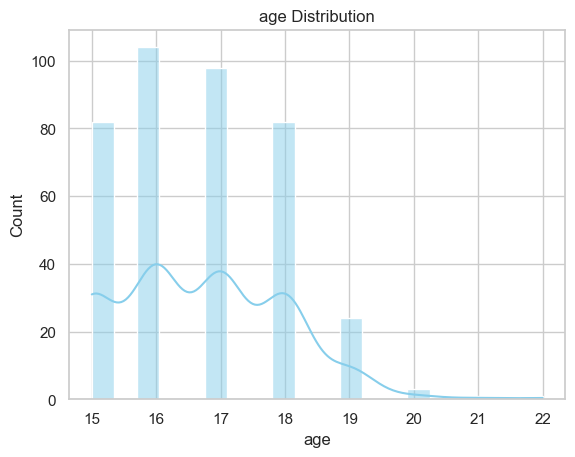

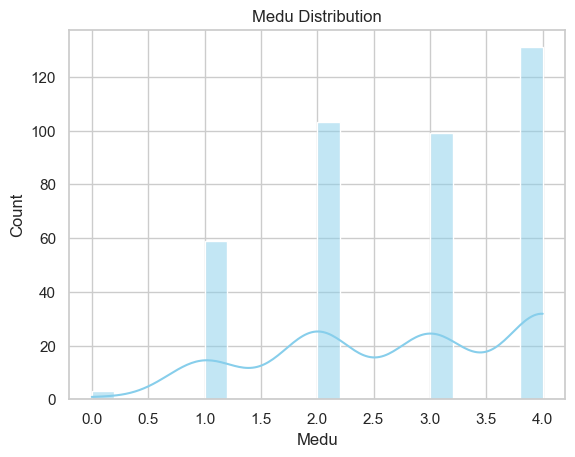

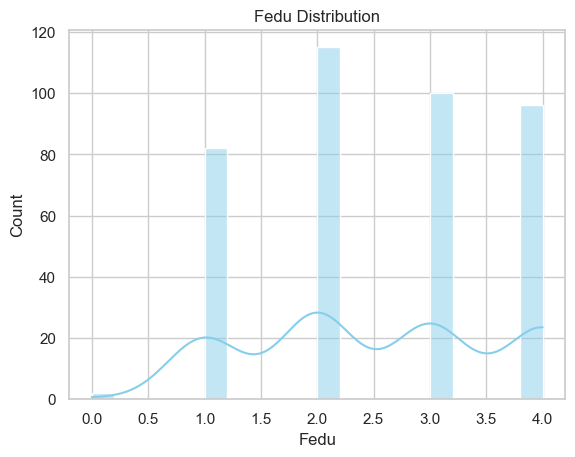

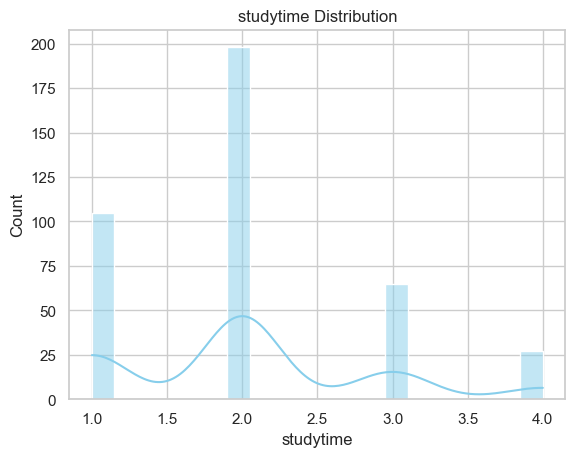

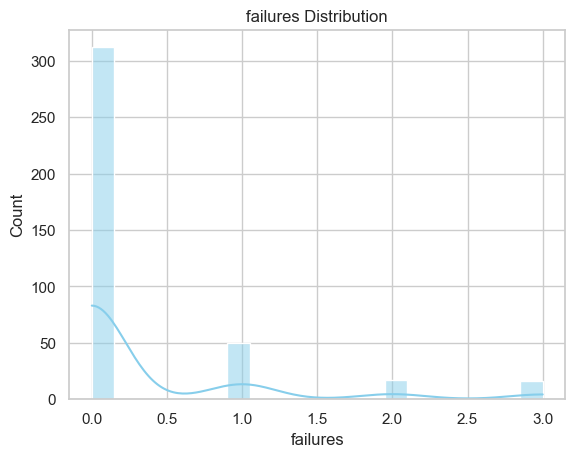

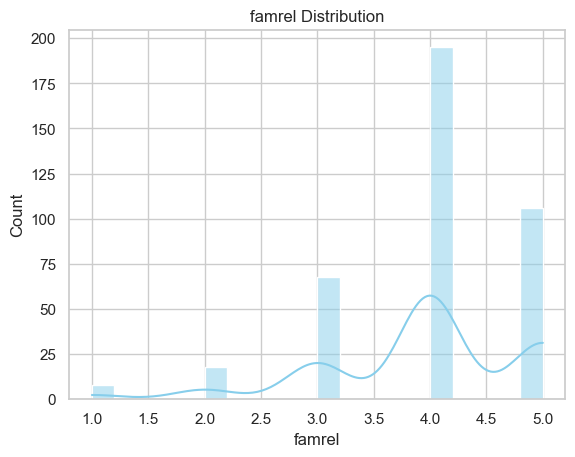

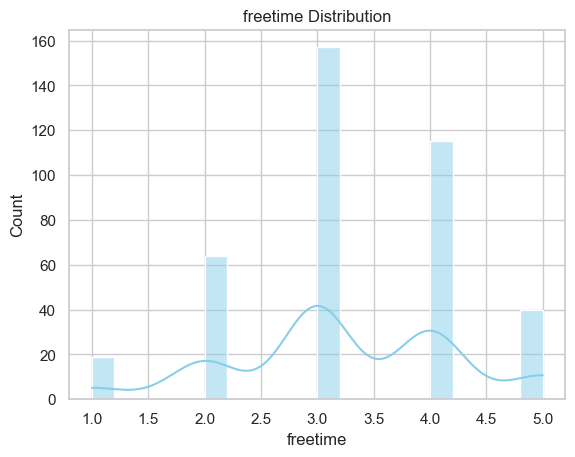

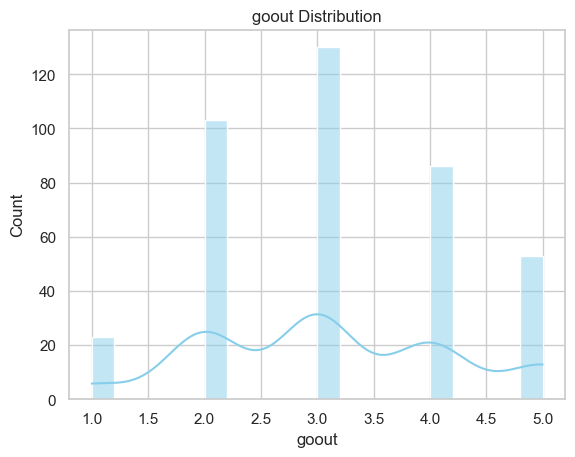

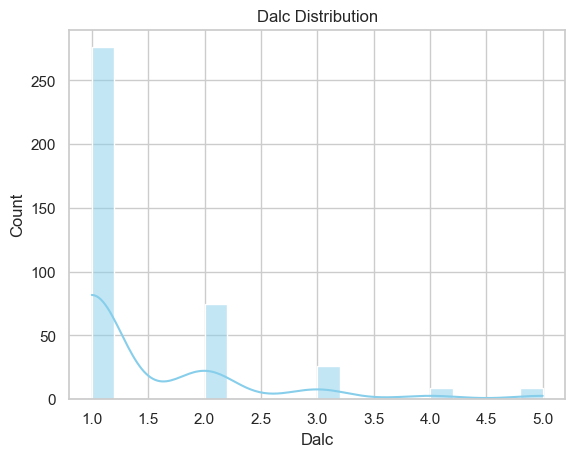

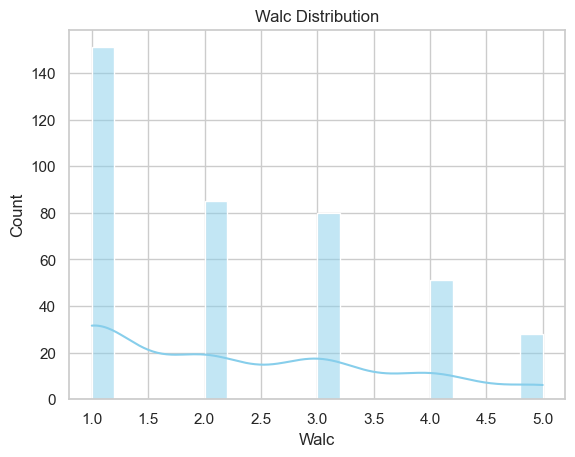

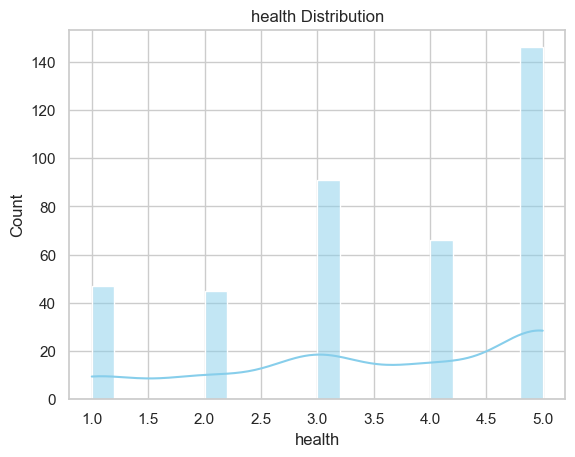

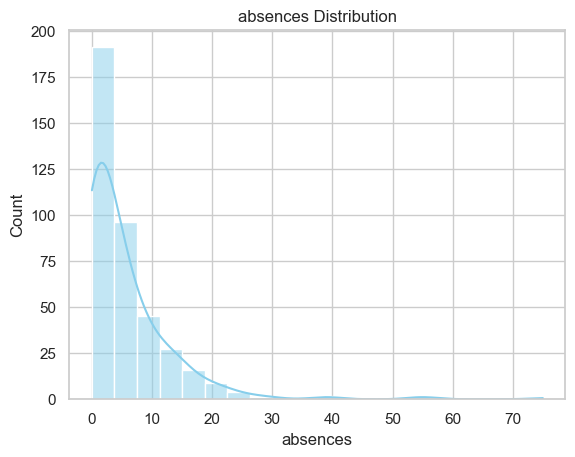

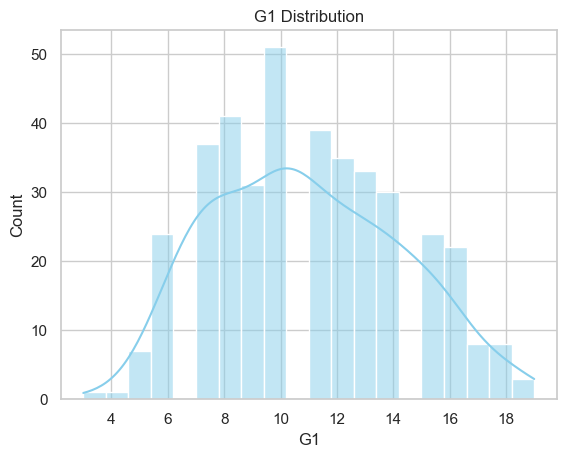

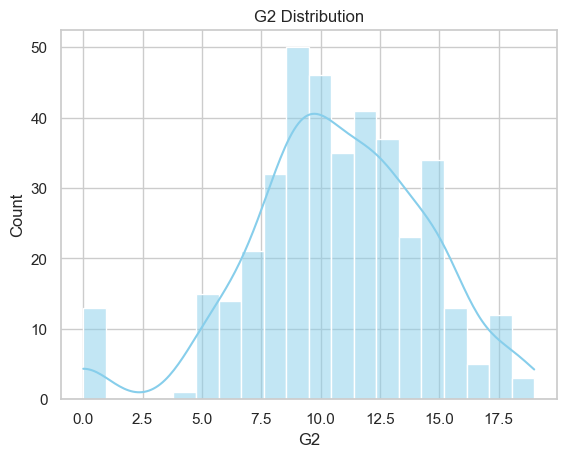

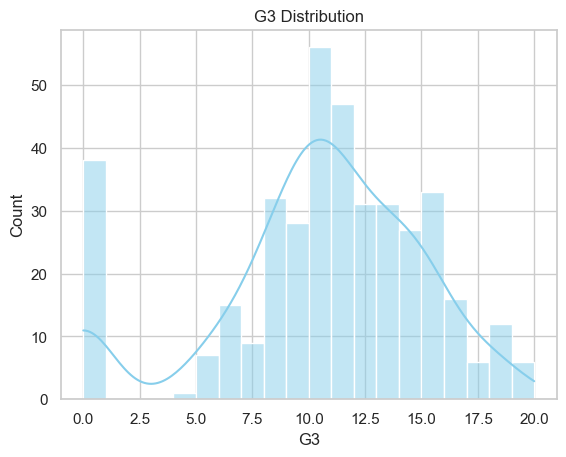

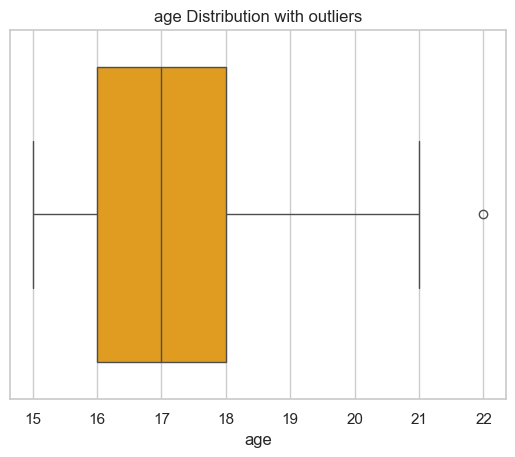

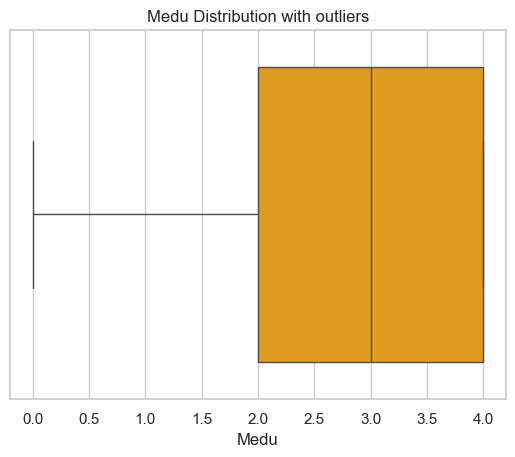

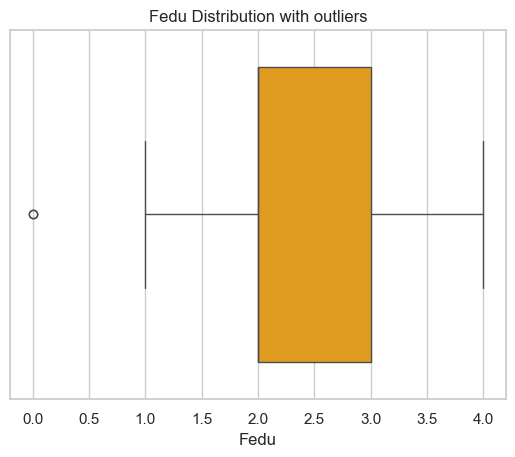

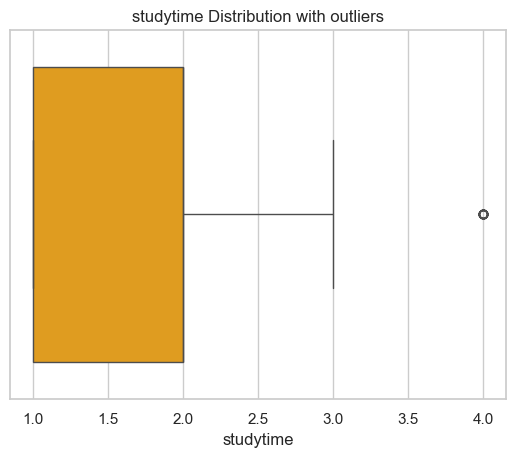

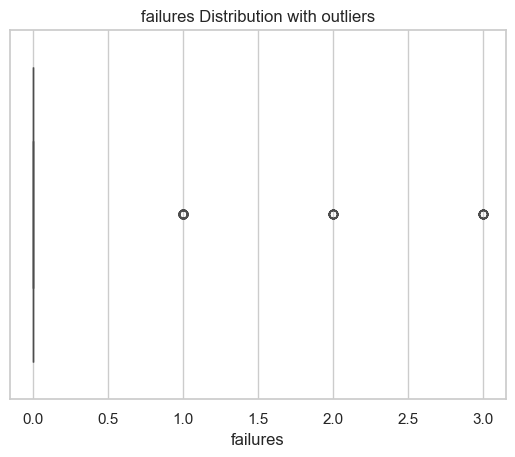

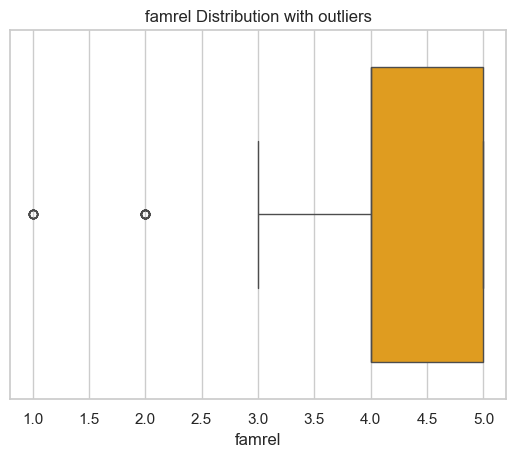

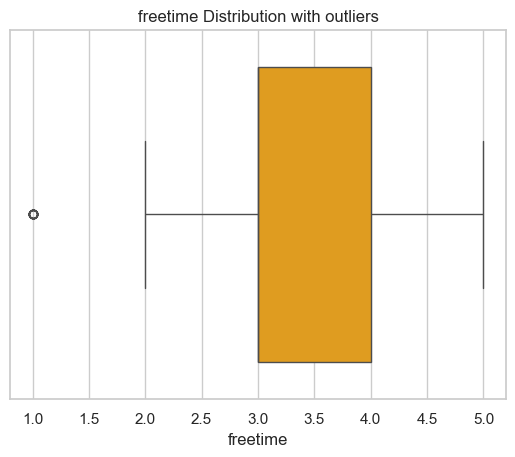

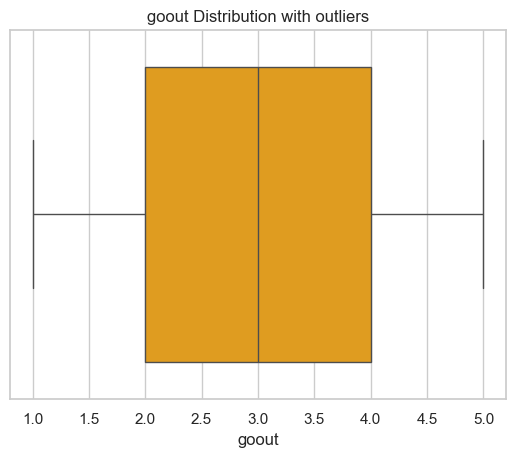

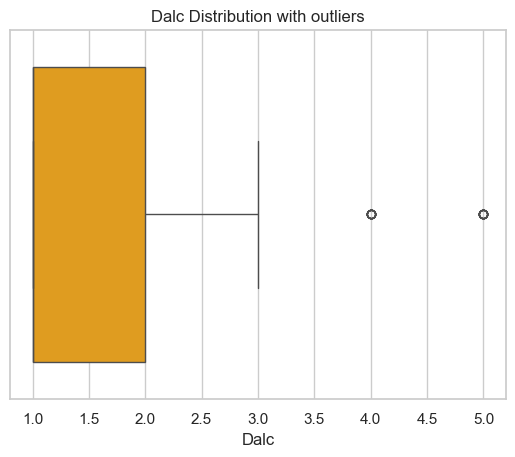

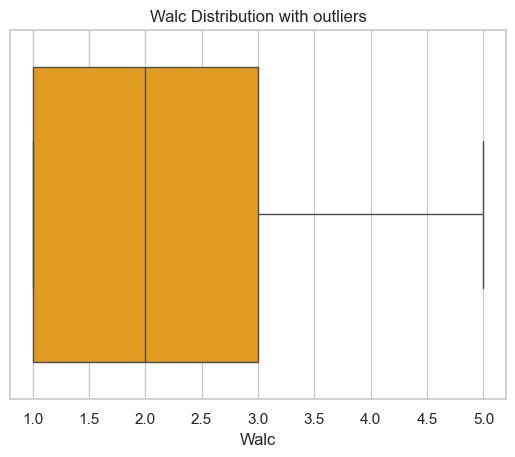

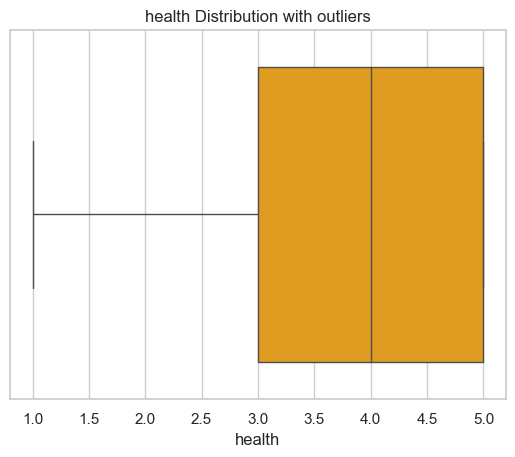

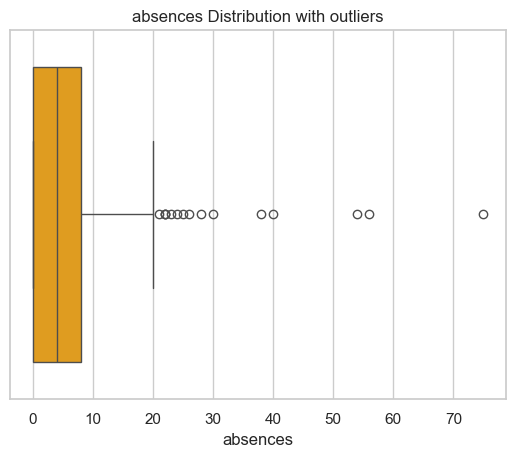

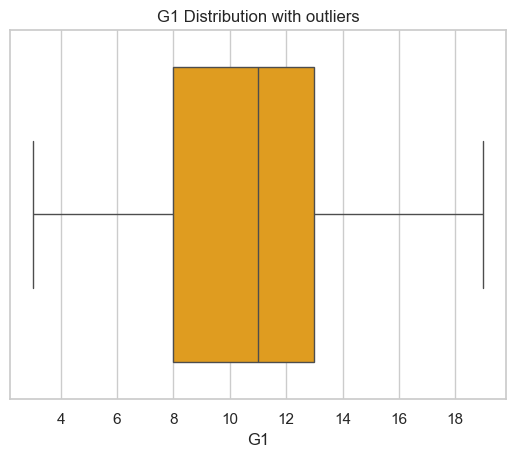

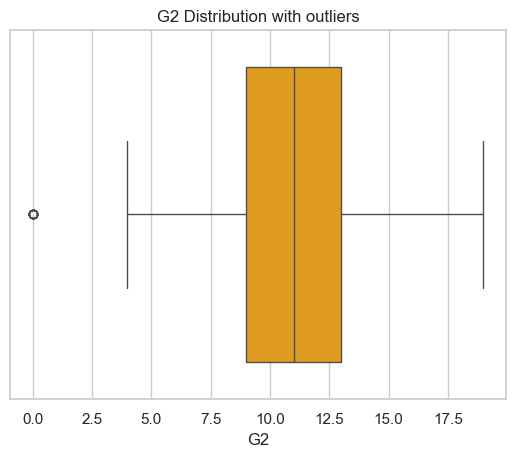

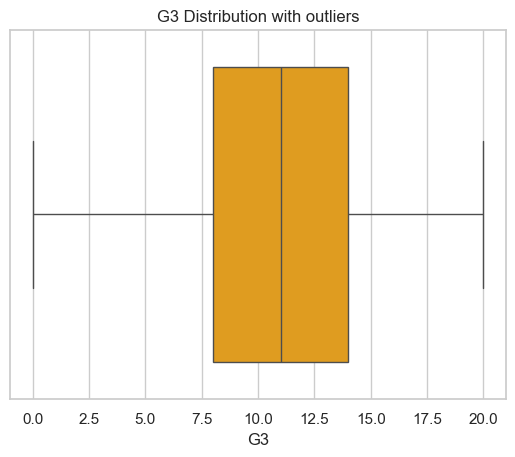

In [7]:
num_cols = ['age','Medu','Fedu','studytime','failures','famrel','freetime',
            'goout','Dalc','Walc','health','absences','G1','G2','G3']
df[num_cols].describe()

# Histograms
for col in num_cols:
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f"{col} Distribution")
    plt.show()

# Boxplots
for col in num_cols:
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"{col} Distribution with outliers")
    plt.show()


### Bivariate Analysis - Numerical vs Numerical

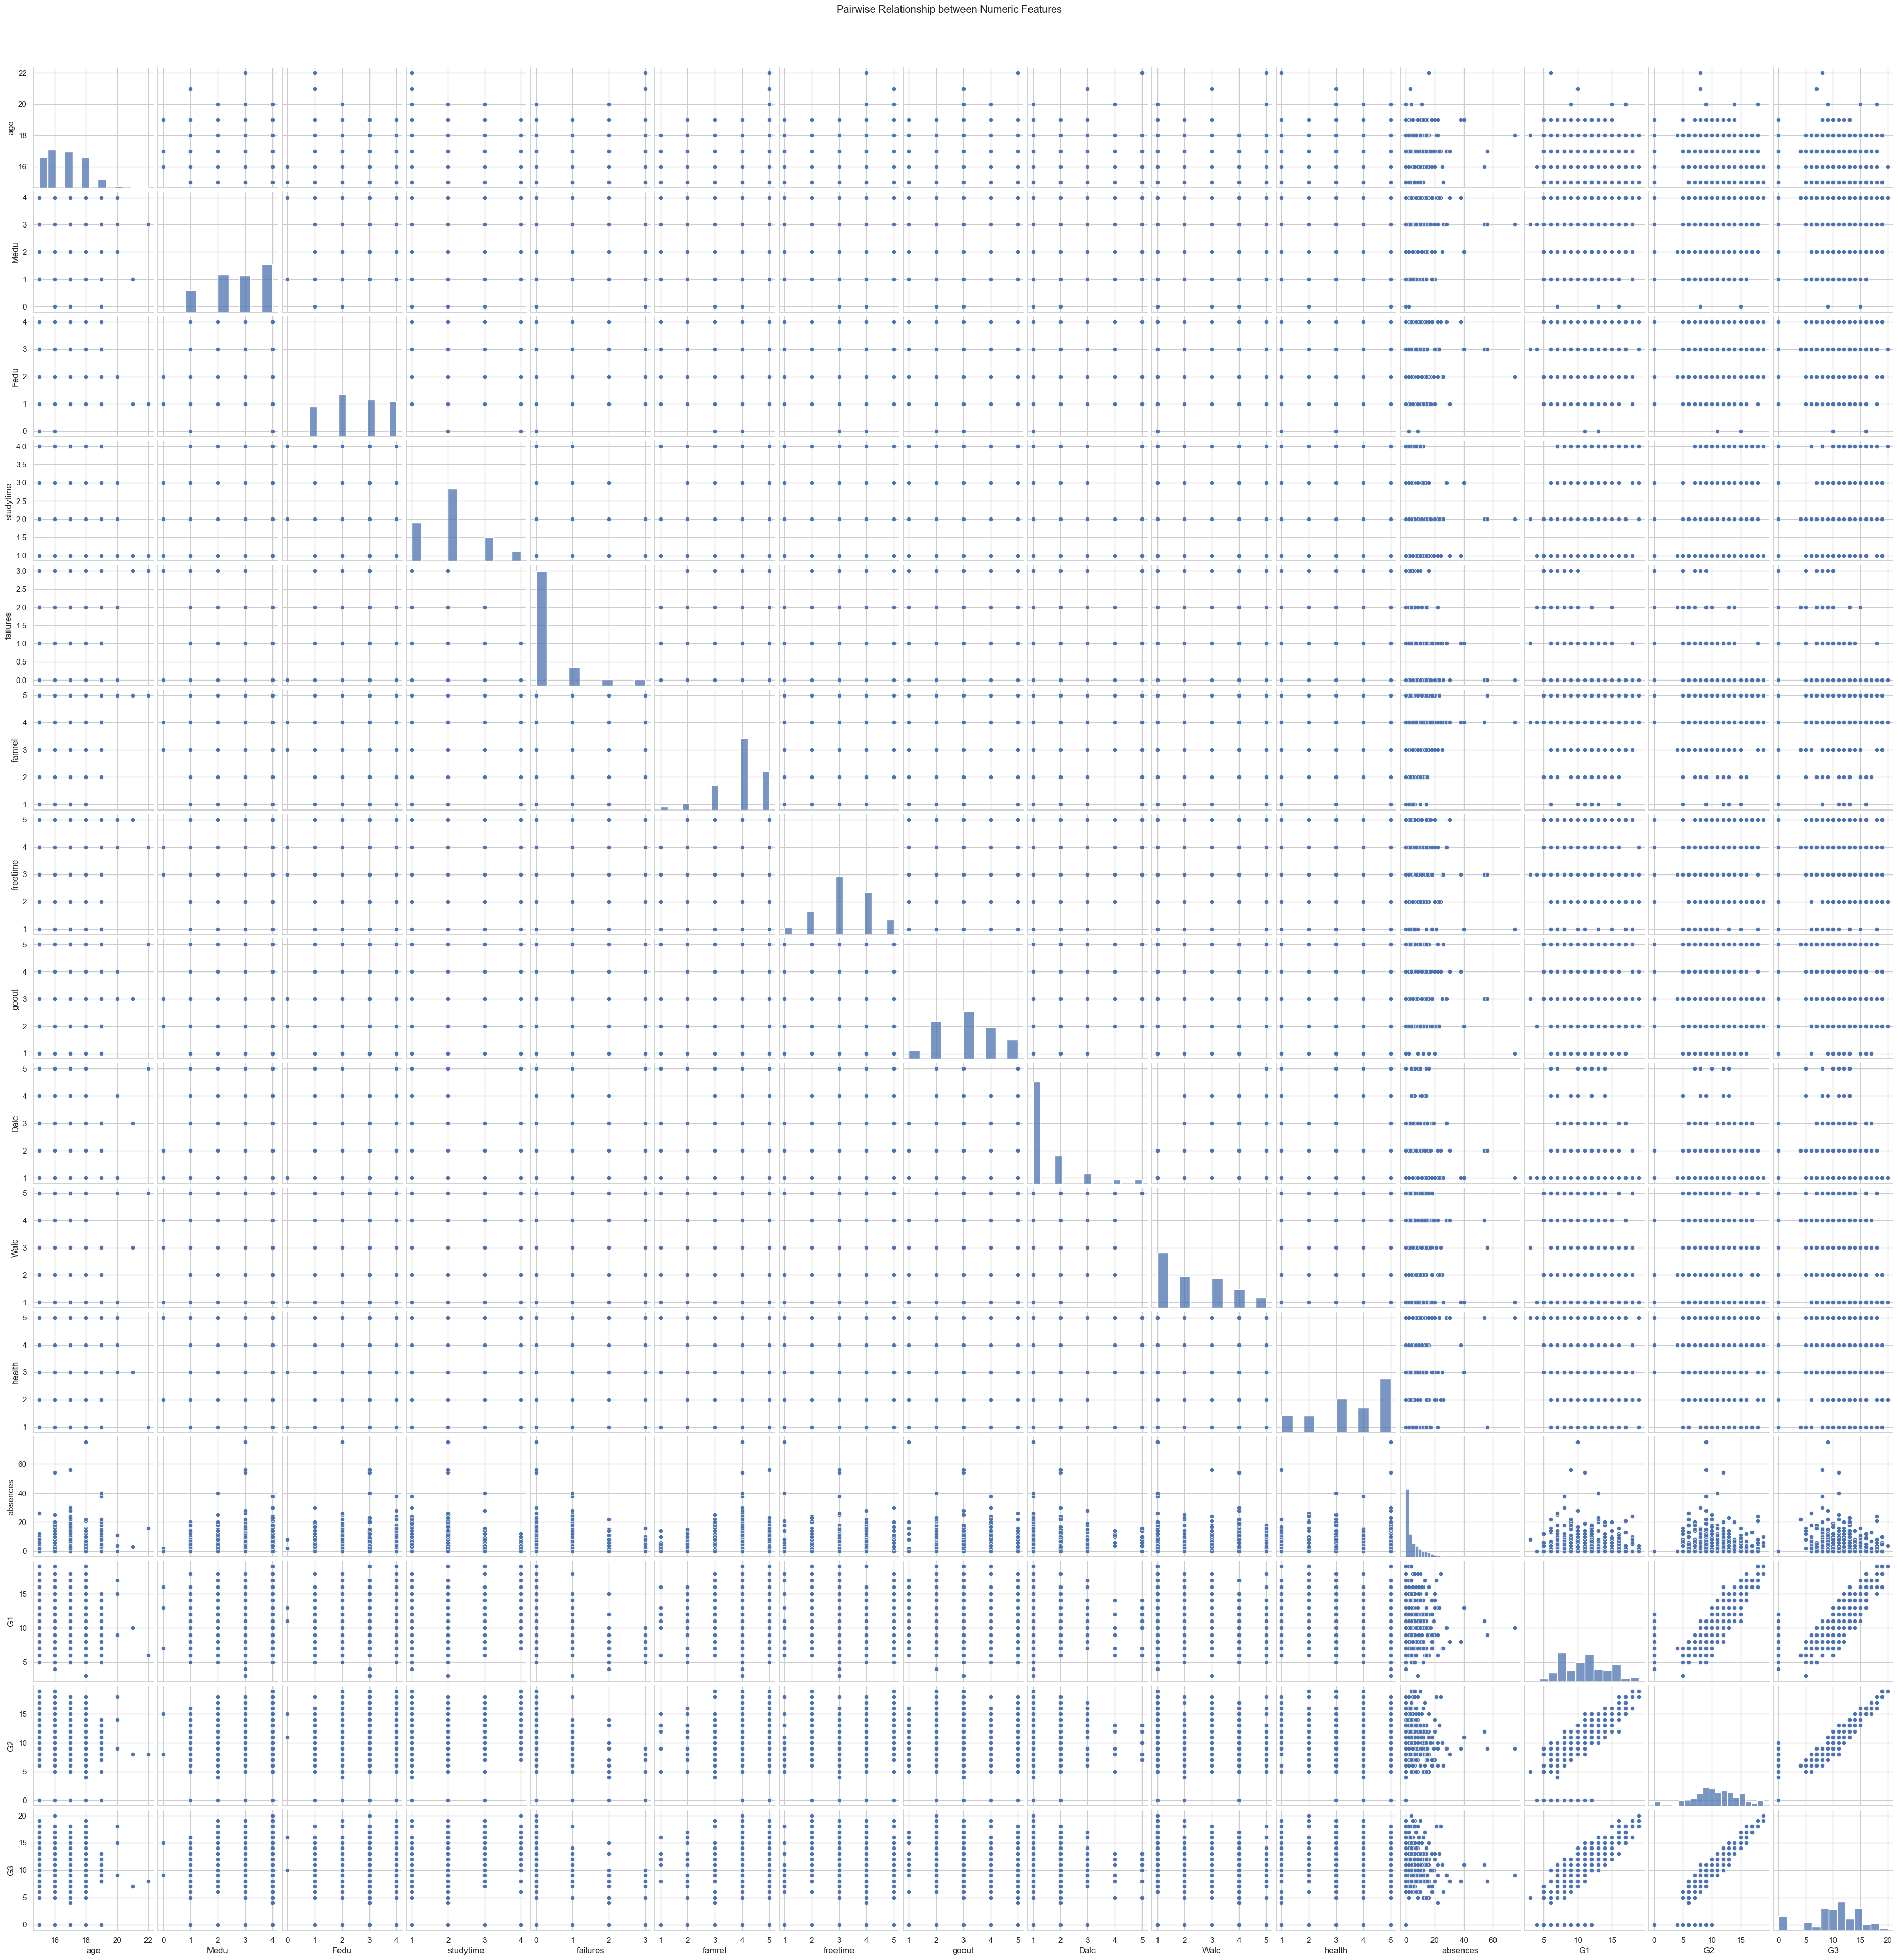

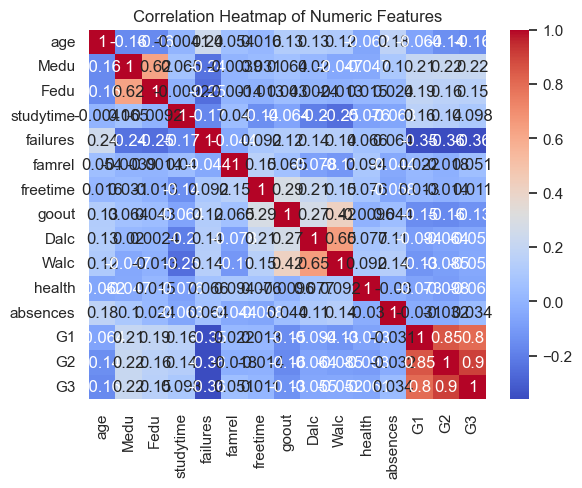

In [8]:
sns.pairplot(df[num_cols])
plt.suptitle("Pairwise Relationship between Numeric Features", y=1.02)
plt.show()

# Correlation Heatmap
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Outlier Detection using IQR

In [9]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col]<lower) | (df[col]>upper)]
    print(f"Number of outliers in {col}:", len(outliers))
    df[col+'_capped'] = df[col].clip(lower, upper)

Number of outliers in age: 1
Number of outliers in Medu: 0
Number of outliers in Fedu: 2
Number of outliers in studytime: 27
Number of outliers in failures: 83
Number of outliers in famrel: 26
Number of outliers in freetime: 19
Number of outliers in goout: 0
Number of outliers in Dalc: 18
Number of outliers in Walc: 0
Number of outliers in health: 0
Number of outliers in absences: 15
Number of outliers in G1: 0
Number of outliers in G2: 13
Number of outliers in G3: 0


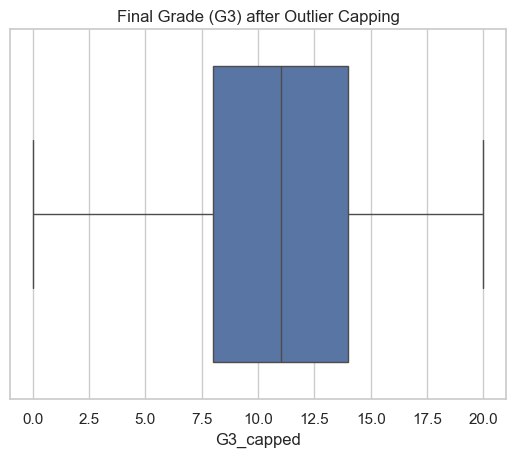

In [10]:
# Boxplot example after capping
sns.boxplot(x=df['G3_capped'])
plt.title("Final Grade (G3) after Outlier Capping")
plt.show()

### Feature Engineering

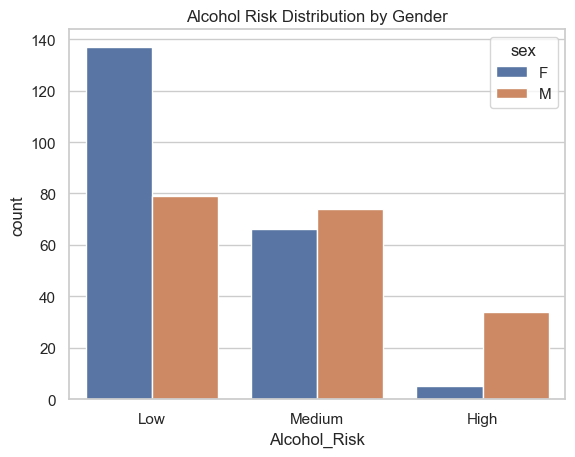

In [11]:
# Average Grade
df['Average_Grade'] = df[['G1','G2','G3']].mean(axis=1)

# Alcohol Risk Level based on weekday and weekend alcohol consumption
df['Alcohol_Risk'] = pd.cut(df[['Dalc','Walc']].mean(axis=1),
                             bins=[0,1.5,3,5],
                             labels=['Low','Medium','High'])

sns.countplot(x='Alcohol_Risk', hue='sex', data=df)
plt.title("Alcohol Risk Distribution by Gender")
plt.show()

### Insights:
#### 1. Weekend and weekday alcohol consumption strongly affects final grade (G3).
#### 2. Students with higher parental education tend to perform better.
#### 3. Outlier capping helps to reduce extreme effects on analysis.

### Export Cleaned Data

In [12]:
df.to_csv("Student_Alcohol_Cleaned.csv", index=False)
print("\nCleaned Student Alcohol data saved as Student_Alcohol_Cleaned.csv")

import os
print(os.getcwd())


Cleaned Student Alcohol data saved as Student_Alcohol_Cleaned.csv
c:\Users\Divya\Desktop\Tekworks
